In [1]:
cd /content/drive/My Drive/AI-ML


/content/drive/My Drive/AI-ML


In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
from tensorflow import lite

In [5]:
import pandas as pd
data = pd.read_csv("Weather.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape

(119040, 31)

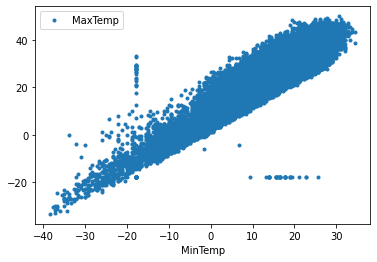

In [8]:
import matplotlib.pyplot as plt
data.plot(x='MinTemp',y='MaxTemp',style='.')


# New Section

In [9]:
temp_max=data['MaxTemp']
temp_min=data['MinTemp']


In [10]:
temp_max.shape

(119040,)

In [11]:
temp_min.shape

(119040,)

In [12]:
import numpy as np
temp_max_array =np.asarray(temp_max)
temp_min_array = np.asarray(temp_min)

In [13]:
temp_max_array

array([25.55555556, 28.88888889, 26.11111111, ..., 28.33333333,
       28.33333333, 29.44444444])

In [14]:
temp_max_array

array([25.55555556, 28.88888889, 26.11111111, ..., 28.33333333,
       28.33333333, 29.44444444])

In [15]:
temp_max_array = temp_max_array.reshape(-1,1)

In [16]:
temp_max_array.shape

(119040, 1)

In [17]:
temp_min_array

array([22.22222222, 21.66666667, 22.22222222, ..., 18.33333333,
       18.33333333, 17.22222222])

In [18]:
temp_min_array = temp_min_array.reshape(-1,1)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_min_array,temp_max_array,test_size=0.3,random_state=42)

In [20]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(83328, 1) (35712, 1) (83328, 1) (35712, 1)


In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
regressor.coef_

array([[0.91895795]])

In [23]:
regressor.intercept_

array([10.68834666])

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
predicted_df = pd.DataFrame({'Actual': y_test.flatten(),'Predicted': y_pred.flatten()})
predicted_df

,Actual,Predicted
0,30.000000,27.535909
1,28.888889,30.088570
2,28.333333,30.088570
3,33.333333,35.193892
4,38.888889,35.704424
...,...,...
35707,21.666667,19.877926
35708,27.222222,28.556973
35709,33.888889,33.151763
35710,-12.777778,-8.201345


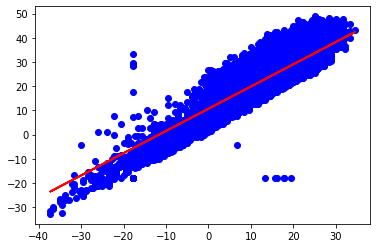

In [26]:
plt.scatter(X_test,y_test, color='blue')
plt.plot(X_test,y_pred ,color='red' ,linewidth=2)
plt.show()

In [27]:
from sklearn import metrics
import numpy as np
print('Mean Apsolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Apsolute Error: 3.1849299993553064
Mean Squared Error: 17.249541919139908
Root Mean Squared Error: 4.153256784637799


In [28]:
predicted_df.head


<bound method NDFrame.head of           Actual  Predicted
0      30.000000  27.535909
1      28.888889  30.088570
2      28.333333  30.088570
3      33.333333  35.193892
4      38.888889  35.704424
...          ...        ...
35707  21.666667  19.877926
35708  27.222222  28.556973
35709  33.888889  33.151763
35710 -12.777778  -8.201345
35711  21.666667  27.535909

[35712 rows x 2 columns]>

In [29]:
predicted_df.to_csv('predicted_df.csv',index=False)

In [30]:
cat predicted_df.csv

Actual,Predicted
30.0,27.535909079602384
28.88888889,30.0885700542788
28.33333333,30.0885700542788
33.33333333,35.19389200363163
38.88888889,35.70442419305317
30.0,34.17282761559898
31.66666667,32.1306988303441
27.22222222,23.96218371689332
24.44444444,26.514844691569735
31.66666667,31.109634442311453
32.22222222,31.109634442311453
27.22222222,27.535909079602384
27.22222222,32.64123102895522
28.33333333,23.96218371689332
32.77777778,31.109634442311453
28.33333333,29.578037864857265
23.33333333,17.835797386859504
29.44444444,32.64123102895522
21.11111111,21.92005494082802
26.66666667,28.046441278213504
14.44444444,19.367393969827436
33.33333333,31.109634442311453
29.44444444,32.64123102895522
32.22222222,28.55697346763504
30.0,31.109634442311453
28.88888889,31.62016664092257
34.44444444,31.109634442311453
28.33333333,27.535909079602384
30.0,29.067505666246152
8.888888889,8.135685690440788
25.0,14.77260421908572
32.22222222,31.62016664092257
31.66666667,29.067505666246152
18.88888889,12.